# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [3]:
df.shape


(1863, 14)

## Linear Regression Model

In [4]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [5]:
# seperate input features in x

x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [6]:
# import module train test split
from sklearn.model_selection import train_test_split
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=df['property_type_Condo'], test_size=0.2,random_state=123)

In [7]:
# create an object of the class
Regression = LinearRegression()
# train your model
model = Regression.fit(x_train,y_train)
# make preditions on train set
y_trainpred = model.predict(x_train)

In [8]:
# evaluate your model
from sklearn.metrics import mean_absolute_error
# we need mean absolute error
train_mae = mean_absolute_error(y_train,y_trainpred)
print('Train error is', train_mae)

Train error is 83398.90102791574


In [9]:
# make predictions on test set
y_pred = model.predict(x_test)
#evaluate the model
test_mae = mean_absolute_error(y_test,y_pred)
print('Test error is', test_mae)

Test error is 89209.40588392898


## Is your model good? What did the business ask?

### Decision Tree

In [10]:
# import Decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

In [54]:
# create an object of the class
dt = DecisionTreeRegressor(max_depth=4, max_features=9)

In [55]:
# train your model
dtmodel = dt.fit(x_train,y_train)

In [56]:
# make preditions on train set
y_trainpred_dt = dtmodel.predict(x_train)

In [57]:
# make predictions on test set
y_pred_dt = dtmodel.predict(x_test)

In [58]:
# we need mean absolute error
dt_train_mae = mean_absolute_error(y_train,y_trainpred_dt)
print('Train error is', dt_train_mae)

Train error is 55176.52871817014


In [59]:
#evaluate the model
dt_test_mae = mean_absolute_error(y_test,y_pred_dt)
print('Test error is', dt_test_mae)

Test error is 60177.657643531296


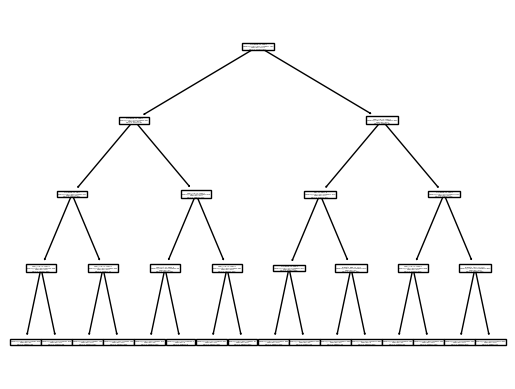

In [60]:
from sklearn import tree
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)
plt.savefig('tree.png',dpi=300)

### Random Forrest

In [68]:
# import Decision tree regressor model
from sklearn.ensemble import RandomForestRegressor

In [81]:
# create an object of the class
rf = RandomForestRegressor(n_estimators=50, criterion='absolute_error')

In [82]:
# train your model
rfmodel = rf.fit(x_train,y_train)

In [83]:
# make preditions on train set
y_trainpred_rf = rfmodel.predict(x_train)

In [84]:
# make predictions on test set
y_pred_rf = rfmodel.predict(x_test)

In [85]:
# we need mean absolute error
rf_train_mae = mean_absolute_error(y_train,y_trainpred_rf)
print('Train error is', rf_train_mae)

Train error is 17735.536731543623


In [86]:
#evaluate the model
rf_test_mae = mean_absolute_error(y_test,y_pred_rf)
print('Test error is', rf_test_mae)

Test error is 44686.233538873996


### Pickle

In [90]:
!pip install pickle

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [91]:
import pickle

In [92]:
#save the model
pickle.dump(rfmodel, open('RF_Model', 'wb'))

In [93]:
#load the model
predmodel = pickle.load(open('RF_Model', 'rb'))

In [94]:
predmodel.predict([[2013,234,81,1,1,584,2013,0,0,0,1,0,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([303598.74])